Random sample imputation is used to fill the missing values with a random value of that particular column
We have to do this with pandas, its not available in sklearn

- This is used when we apply linear algorithms on data
- When tree based algorithms are used this method is not much useful

- The distribution almost remains same after imputing missing values with random sample imputaion
- covariance changes thats a drawback
- Also its memory heavy for deployment because, we need to store original training set on server so that if the new data contains missing values, a random number will be generated and replaced with missing values but if the dataset is large then a lot of memory will be used to store the dataset on server

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [8]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [9]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [10]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values
# sample() returns a sample value of a column so we are replacing all the
# missing values with random value 

C:\Users\aniru\AppData\Local\Temp\ipykernel_1624\866777868.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
C:\

In [11]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([45.  , 28.5 , 22.  ,  6.  ,  3.  , 24.  ,  2.  , 22.  , 23.  ,
       31.  , 23.  , 32.  ,  2.  ,  9.  , 34.  , 39.  , 13.  ,  6.  ,
       20.  , 24.  , 27.  , 18.  , 38.  ,  0.83, 30.  , 52.  ,  4.  ,
       24.  , 11.  , 27.  , 25.  , 16.  , 41.  , 20.  ,  8.  , 21.  ,
       59.  , 24.  , 28.  ,  9.  , 19.  ,  9.  ,  3.  , 30.  , 47.  ,
       47.  , 36.  , 22.  , 50.  , 45.5 , 18.  , 19.  , 36.  , 28.  ,
       38.  , 24.  , 30.  , 22.  , 31.  , 32.  , 20.  , 33.  , 42.  ,
       19.  , 27.  , 35.  , 28.  ,  3.  , 25.  ,  8.  , 26.  , 22.  ,
       24.  , 22.  ,  9.  , 16.  , 36.  , 42.  , 32.  , 47.  , 27.  ,
       34.  ,  5.  , 43.  , 17.  ,  7.  , 31.  , 39.  , 42.  , 47.  ,
       36.  , 44.  , 48.  , 29.  , 23.  , 16.  , 40.  , 32.  , 32.  ,
       44.  ,  0.75, 60.  , 49.  , 31.  , 31.  , 34.  , 24.  , 17.  ,
       23.  , 24.  , 32.  , 16.  , 36.  , 30.  , 27.  , 31.  , 33.  ,
       20.  , 41.  , 28.  , 22.  , 25.  , 27.  , 29.  , 24.  , 16.  ,
       19.  , 27.  ,

In [12]:
X_train['Age'].isnull().sum()

148

In [13]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,44.0
493,71.0,49.5042,71.0
527,NaN,221.7792,2.0


C:\Users\aniru\AppData\Local\Temp\ipykernel_1624\2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
c:\Users\aniru\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aniru\AppData\Local\Temp\ipykernel_1624\2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

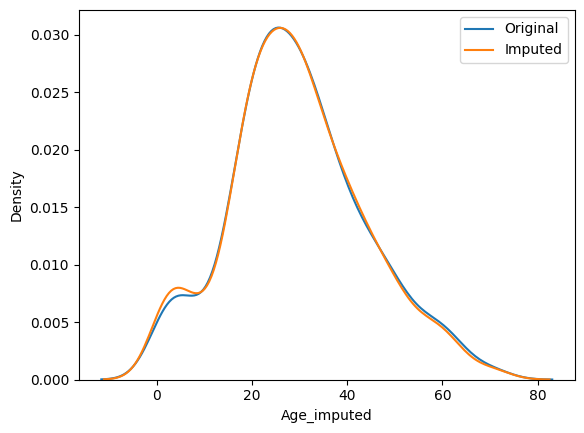

In [14]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [15]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  203.97288164477948


In [16]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,49.039822
Age,71.512440,204.349513,204.349513
Age_imputed,49.039822,204.349513,203.972882


<Axes: >

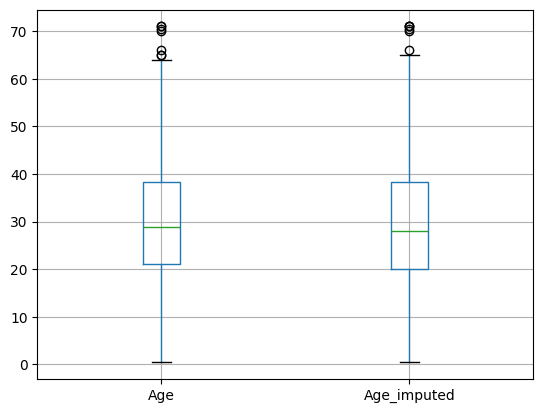

In [17]:
X_train[['Age', 'Age_imputed']].boxplot()

In [22]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(X_train['Fare'].values[0]))
# for the same given input same output should be generated, for that we use this
# *******

## Categorical data

In [19]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [20]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [143]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [23]:
X = data
y = data['SalePrice']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [25]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [26]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1275,NaN,TA,137000,TA,NaN
801,NaN,TA,109900,TA,NaN
957,NaN,TA,132000,TA,NaN
81,NaN,TA,153500,TA,NaN
458,Gd,TA,161000,TA,Gd


In [27]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\aniru\AppData\Local\Temp\ipykernel_1624\856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'

In [28]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [29]:
temp

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.035959
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.001712


In [30]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.648709
TA,0.412439,0.542088
Fa,0.040917,0.052750
Po,0.027823,0.037037
Ex,0.024550,0.030303


C:\Users\aniru\AppData\Local\Temp\ipykernel_1624\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
c:\Users\aniru\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aniru\AppData\Local\Temp\ipykernel_1624\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

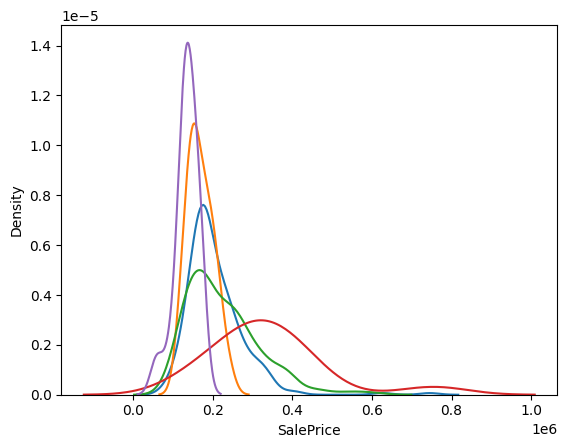

In [31]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\aniru\AppData\Local\Temp\ipykernel_1624\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
c:\Users\aniru\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aniru\AppData\Local\Temp\ipykernel_1624\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in s

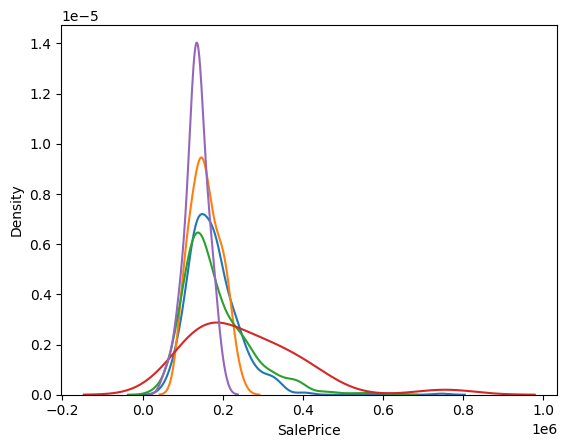

In [32]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()